In [1]:
from imp import reload
import sys
# import rpy2
import os
import os.path
import re
from glob import glob
import numpy as np
import pandas as pd
pd.show_versions()
from scipy import stats
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True
#matplotlib.rcParams['text.usetex'] = False
# Use Type 1 fonts in plots.
matplotlib.rc('pdf', fonttype=42)
# Do not wrap long lines
np.set_printoptions(linewidth=np.nan)
sns.set_style("whitegrid")
%matplotlib inline


INSTALLED VERSIONS
------------------
commit           : 2cb96529396d93b46abab7bbc73a208e708c642e
python           : 3.8.5.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.8.0-41-generic
Version          : #46~20.04.1-Ubuntu SMP Mon Jan 18 17:52:23 UTC 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_GB.UTF-8
LOCALE           : en_GB.UTF-8

pandas           : 1.2.4
numpy            : 1.20.0
pytz             : 2019.3
dateutil         : 2.7.3
pip              : 20.0.2
setuptools       : 45.2.0
Cython           : 3.0a6
pytest           : 4.6.9
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.5.0
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10.1
IPython          : 7.13.0
pandas_datareader: None
bs4              : 4.8.2
bottleneck       : None
fs

In [2]:
def read_alldata(pat="./*.csv"):
    lis = []
    for filename in glob(pat, recursive=True):
        tmp = pd.read_csv(filename)
        print(filename)
        if "SafeOpt-" in filename:
            tmp['Algorithm'] = "SafeOpt"
        elif "SafeOptMod-" in filename:
            tmp['Algorithm'] = "SafeOptMod"
        match = re.search(r'-nseeds=([0-9]+)', filename.strip())
        if match:
            tmp['Nseeds'] = int(match.group(1));
        match = re.search(r'-(sphere_[^-]+)-', filename.strip())
        if match:
            tmp['Instance'] = match.group(1);
        lis.append(tmp)
    return pd.concat(lis, sort = True)

df = read_alldata()
print(df)
sel_insts = np.sort(df.Instance.unique())

./results-SafeOpt-sphere_2D_75-nseeds=10.csv
./results-SafeOptMod-sphere_2D_75-nseeds=5.csv
./results-SafeOptMod-sphere_2D_75-nseeds=1.csv
./results-SafeOptMod-sphere_2D_75-nseeds=10.csv
./results-SafeOpt-sphere_2D_75-nseeds=1.csv
./results-SafeOpt-sphere_2D_75-nseeds=5.csv
    Algorithm      Instance  Nseeds  rep    t          y
0     SafeOpt  sphere_2D_75      10    1    1  95.844254
1     SafeOpt  sphere_2D_75      10    1    2  96.621841
2     SafeOpt  sphere_2D_75      10    1    3  94.728676
3     SafeOpt  sphere_2D_75      10    1    4  95.586022
4     SafeOpt  sphere_2D_75      10    1    5  96.531239
..        ...           ...     ...  ...  ...        ...
495   SafeOpt  sphere_2D_75       5    5   96  99.999900
496   SafeOpt  sphere_2D_75       5    5   97  99.999900
497   SafeOpt  sphere_2D_75       5    5   98  99.999900
498   SafeOpt  sphere_2D_75       5    5   99  99.999900
499   SafeOpt  sphere_2D_75       5    5  100  99.999900

[3000 rows x 6 columns]


instance:  sphere_2D_75
Algorithm   Nseeds  rep
SafeOpt     1       1      100
                    2      100
                    3      100
                    4      100
                    5      100
            5       1      100
                    2      100
                    3      100
                    4      100
                    5      100
            10      1      100
                    2      100
                    3      100
                    4      100
                    5      100
SafeOptMod  1       1      100
                    2      100
                    3      100
                    4      100
                    5      100
            5       1      100
                    2      100
                    3      100
                    4      100
                    5      100
            10      1      100
                    2      100
                    3      100
                    4      100
                    5      100
dtype: int64
Saving to

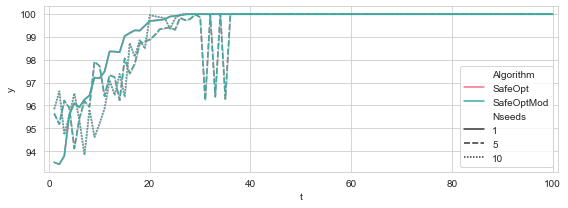

In [3]:
for inst in sel_insts:
    subdf = df[df.Instance.str.contains(inst)].sort_values('Algorithm')
    print("instance: ", inst)
    if len(subdf) == 0: continue
    print(subdf.groupby(['Algorithm', 'Nseeds','rep']).size())
    plt.figure(figsize=(8,3))
    palette = sns.color_palette("husl", subdf['Algorithm'].nunique())
    g = sns.lineplot(x='t', y='y', hue='Algorithm', data=subdf, palette=palette, style="Nseeds")
    g.set(xlim=(-1, 101))
    plt.tight_layout()
    filename = 'img/fitness_' + subdf.Instance.iloc[0].replace('/','_').replace('.','_') + '.pdf'
    print("Saving to " + filename)
    #plt.savefig(filename)
    plt.show()